In [136]:
import sys
from collections import OrderedDict
import pandas as pd
import numpy as np
# Load libraries
import pandas
import pandas as pd
#from pandas.plotting import scatter_matrix <-- deprecated
from pandas.tools.plotting import scatter_matrix

In [137]:
fname = 'BigData\\BigData.xlsx'
dataset = pandas.read_excel(fname)

# preprocessing
dataset = dataset.replace('.', np.nan)
dataset.iloc[:, 6:] = dataset.iloc[:, 6:].apply(lambda row: row.astype(float))

In [138]:
# Applying Regression Model on original data
columnsListB = dataset.columns.values.tolist()
depVar = dataset['Disease Incidence'].values

# Three cases for independent vars: TAV, Rain fall, RH
st1 = columnsListB.index('pcpn_JunW1')
ed1 = columnsListB.index('pcpn_SeptW4')
st2 = columnsListB.index('TAV_JunW1')
ed2 = columnsListB.index('TAV_SeptW4')
st3 = columnsListB.index('RAV_JunW1')
ed3 = columnsListB.index('RAV_SeptW4')
indepVarRain = dataset.iloc[:, st1:ed1+1]
indepVarTAV = dataset.iloc[:, st2:ed2+1]
indepVarRAV = dataset.iloc[:, st3:ed3+1]

In [153]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import Ridge, LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import ResidualsPlot

In [154]:
models = [
    SVC(gamma='auto'), LinearSVC(), KNeighborsClassifier(),
    LogisticRegressionCV(cv=3),
    RandomForestClassifier(n_estimators=300)
]

In [155]:
def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])
    cl = ['Present', 'Absent']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    
    visualizer = ClassificationReport(
        estimator, classes=[0,1], **kwargs
    )
    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))


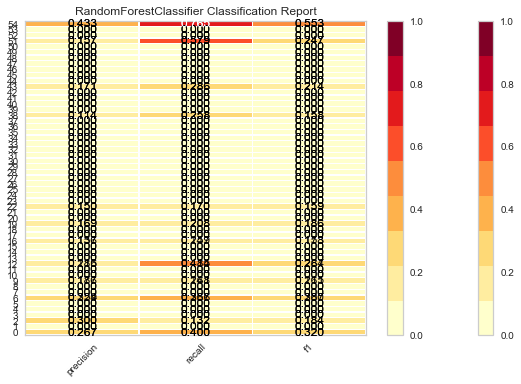

In [183]:
# 1st case:
# First case:
X1 = indepVarRain
y1 = depVar


lab_enc = preprocessing.LabelEncoder()
y1 = lab_enc.fit_transform(y1)
# y1 = LabelEncoder().fit_transform(y1)

# for model in models:
#     visualize_model(X1, y1, model)
#     score_model(X1, y1, model)
# Create the train and test data 
model = RandomForestClassifier(n_estimators=50)
visualizer = ClassificationReport(model)
visualizer.fit(X1, y1)
visualizer.score(X1, y1)
visualizer.poof()

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X1, y1, test_size=0.2)

In [160]:
#### RIDGE #####

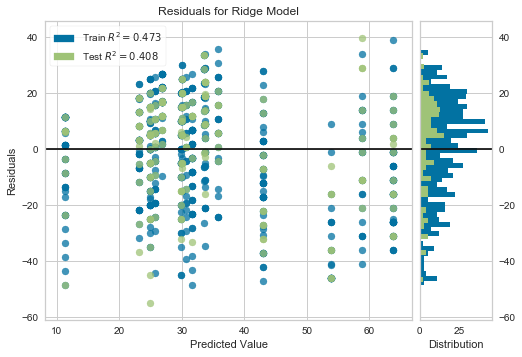

In [161]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_reg_train, y_reg_train) 
visualizer.score(X_reg_test, y_reg_test) 
visualizer.poof()

In [162]:
### LASSO ####

In [172]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# To avoid warnings
# import warnings
# warnings.filterwarnings('ignore')

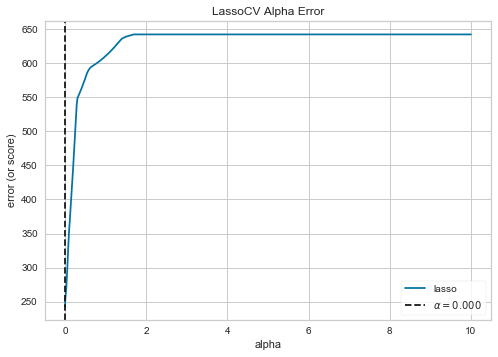

In [173]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_reg_train, y_reg_train)
visualizer.score(X_reg_test, y_reg_test)
visualizer.poof()

In [176]:
coefficients = pd.concat([pd.DataFrame(X1.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients

0            0
0    pcpn_JunW1  -879.633193
1    pcpn_JunW2   547.743513
2    pcpn_JunW3   -19.589440
3    pcpn_JunW4    79.092428
4    pcpn_JulW1   278.484509
5    pcpn_JulW2   115.927604
6    pcpn_JulW3   469.958574
7    pcpn_JulW4  -258.556045
8    pcpn_AugW1  -411.423696
9    pcpn_AugW2   103.641884
10   pcpn_AugW3 -1011.837206
11   pcpn_AugW4   -63.994701
12  pcpn_SeptW1   317.470076
13  pcpn_SeptW2  -558.726856
14  pcpn_SeptW3  -653.515914
15  pcpn_SeptW4  -448.390888